# Initial EDA

In [36]:
%%capture
!pip install shap

In [13]:
import pandas as pd
import numpy as np


In [15]:
df = pd.read_csv('processed_marketing_campaign.csv')

In [16]:
df.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,TotalSpent,Mn_Customer,AgeGroup,Children,campaignConvert
0,-0.790438,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,0.351030,1.426865,2.503607,-0.555814,0.692181,1.018352,1.676245,1.936840,1.237486,-1.264598,1
1,-0.790438,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,-0.168701,-1.126420,-0.571340,-1.171160,-0.132545,1.274785,-0.963297,-1.714136,1.237486,1.404572,0
2,-0.790438,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,-0.688432,1.426865,-0.229679,1.290224,-0.544908,0.334530,0.280110,-0.149432,-0.221639,-1.264598,0
3,-0.790438,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,-0.168701,-0.761665,-0.913000,-0.555814,0.279818,-1.289547,-0.920135,-1.974920,-1.680765,0.069987,0
4,1.590024,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,1.390492,0.332600,0.111982,0.059532,-0.132545,-1.033114,-0.307562,-0.801392,-0.221639,0.069987,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2212 entries, 0 to 2211
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   float64
 1   Income               2212 non-null   float64
 2   Kidhome              2212 non-null   float64
 3   Teenhome             2212 non-null   float64
 4   Recency              2212 non-null   float64
 5   MntWines             2212 non-null   float64
 6   MntFruits            2212 non-null   float64
 7   MntMeatProducts      2212 non-null   float64
 8   MntFishProducts      2212 non-null   float64
 9   MntSweetProducts     2212 non-null   float64
 10  MntGoldProds         2212 non-null   float64
 11  NumDealsPurchases    2212 non-null   float64
 12  NumWebPurchases      2212 non-null   float64
 13  NumCatalogPurchases  2212 non-null   float64
 14  NumStorePurchases    2212 non-null   float64
 15  NumWebVisitsMonth    2212 non-null   f

# XGBoost

I have opted for binary classification problem. I created a feature called campaignConvert which denotes whether the customer was converted by any of the campaigns(1 if he got converted else 0). I did this in the preprocess script.  

## Priliminary XGBoost classifier

In [18]:
import xgboost as xg

In [25]:
xgb_cl = xg.XGBClassifier()

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
dfhat = df.loc[:, df.columns != "campaignConvert"]

In [28]:
x_train, x_test, y_train, y_test = train_test_split(dfhat, df['campaignConvert'], test_size = 0.3)

In [32]:
def xgboost_train(x_train, y_train, x_test, y_test):
    xgb_cl.fit(x_train, y_train)
    y_pred = xgb_cl.predict(x_test)
    print(y_pred)
    print(y_test)
    print(xgb_cl.score(x_test, y_test))

In [33]:
xgboost_train(x_train, y_train, x_test, y_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

Getting an accuracy of 0.72. Not so good. Let's do cross validation

## XGBoost with Cross validation

In [29]:
def xgboost_train_cv(x_train, y_train, x_test, y_test):
    from sklearn.model_selection import cross_val_score
    scores = cross_val_score(xgb_cl, x_train, y_train, cv=5)
    print(scores)

In [30]:
xgboost_train_cv(x_train, y_train, x_test, y_test)

[0.70645161 0.72580645 0.70645161 0.72815534 0.69579288]


0.72 is the best score which we are getting. Let's do hyperparameter optimization. 


## XGBoost with GridSearchCV for hyperparameter search

In [42]:
def xgboost_gridsearch(x_train, y_train, x_test, y_test):
    from sklearn.model_selection import GridSearchCV
    param_grid = {
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.5],
        'n_estimators': [100, 200, 300]
    }
    gs = GridSearchCV(xgb_cl, param_grid, cv=5)
    gs.fit(x_train, y_train)
    print(gs.best_params_)
    print(gs.best_score_)

In [43]:
xgboost_gridsearch(x_train, y_train, x_test, y_test)

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
0.7299780770435327


The best set of hyperparameters are getting us accuracy score of about 73%

## XGBoost SHAP Analysis

In [48]:
def shap_values(x_train, y_train, x_test, y_test):
    from shap import TreeExplainer
    explainer = TreeExplainer(xgb_cl)
    shap_values = explainer.shap_values(x_test)
    print(shap_values)
    return shap_values

In [49]:
shap_vals = shap_values(x_train, y_train, x_test, y_test)

[[ 0.00062689  0.18968573  0.05346744 ...  0.07295676  0.
  -0.00219258]
 [ 0.00062689 -0.0720817   0.02287853 ...  0.04549685  0.
  -0.00285633]
 [ 0.00062689 -0.04253975 -0.03010972 ...  0.0424981   0.
  -0.00285633]
 ...
 [ 0.00062689 -0.03791026 -0.03311192 ... -0.04288389  0.
  -0.00285633]
 [ 0.00062689  0.13084099  0.07243714 ...  0.06884774  0.
  -0.00130423]
 [ 0.00062689  0.22724104  0.03339138 ... -0.00270097  0.
  -0.00157113]]


In [50]:
def xgboost_graph(x_train, y_train, x_test, y_test):
    import shap
    from shap import TreeExplainer
    explainer = TreeExplainer(xgb_cl)
    shap_values = explainer.shap_values(x_test)
    shap.summary_plot(shap_values, x_test)

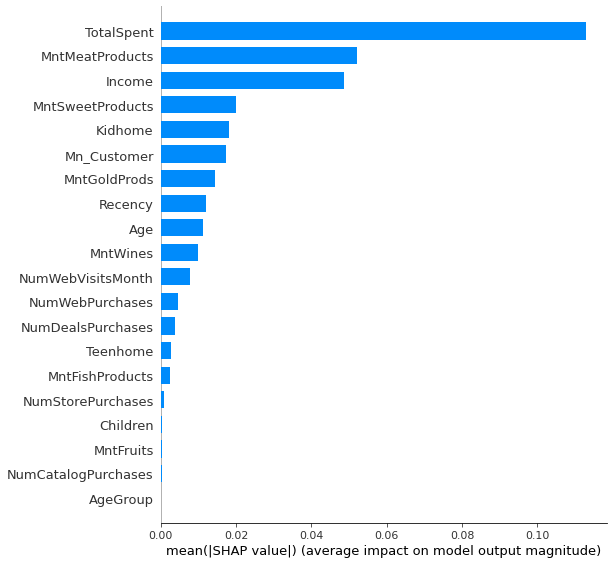

In [65]:
shap.summary_plot(shap_values, x_train, plot_type="bar")

As expected, Total Money spent is the best descriminator for campaign conversion.

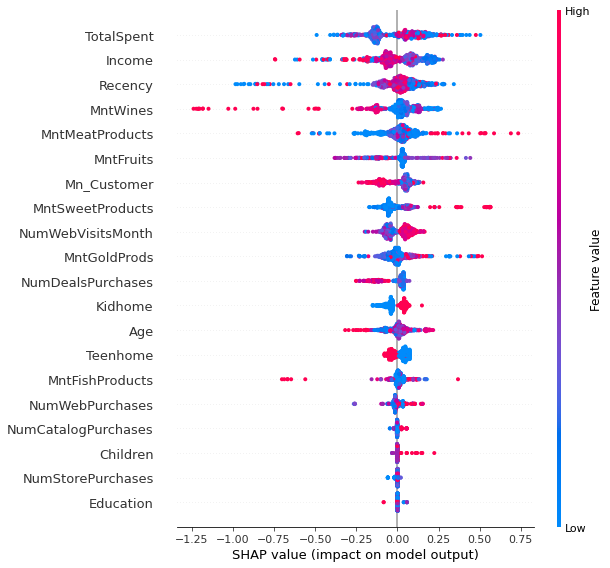

In [51]:
xgboost_graph(x_train, y_train, x_test, y_test)

In [58]:
import shap
model = xg.XGBClassifier(learning_rate=0.01, max_depth=3, n_estimators=100).fit(x_train, y_train)
explainer = shap.Explainer(model)
shap_values = explainer(x_train)

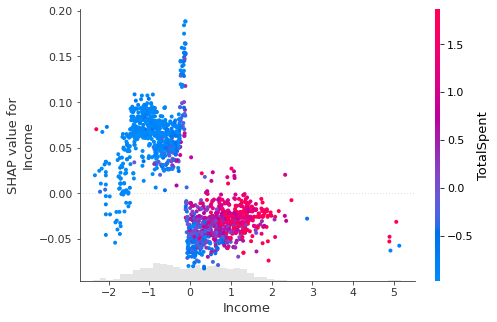

In [59]:
import shap
shap.plots.scatter(shap_values[:,"Income"], color=shap_values)

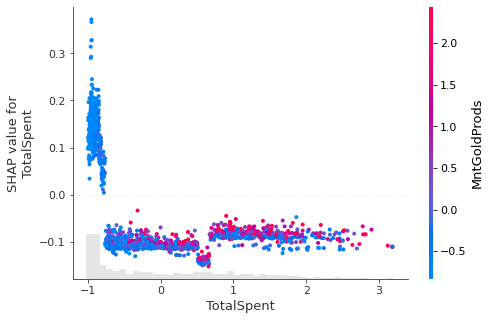

In [60]:
shap.plots.scatter(shap_values[:,"TotalSpent"], color=shap_values)

Looks like the conversion rates for campaigns can be imporved by store campaigns. Those buying in stores are responding less to the campaigns. The company should also focus on company's catalog campaigns. The Age group is also not determining the campaign conversion. The company can also focus more on targeted age group campaigning. 